In [33]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from itertools import combinations

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../../src/"
sys.path.append(src_path)
import support_preprocesing as sp 
import pickle
%load_ext autoreload
%autoreload 2

# Preprocesado y modelado
# -----------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
df = pd.read_pickle("../../results/cluster_sinencod_0.pkl")
df.head(2)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,0
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.480,878.38,High,0


# EDA

In [60]:
df.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,2395.000000,2395.000000,2395.00000,2395.000000,2395.000000
mean,1608.820672,5.482255,0.04138,427.302419,179.268025
std,891.376256,2.560382,0.07501,314.773060,126.137034
min,454.950000,1.000000,0.00000,-317.152800,2.340000
25%,969.191400,4.000000,0.00000,247.011000,90.925000
50%,1322.930000,5.000000,0.00000,341.160000,148.380000
75%,1959.930000,7.000000,0.10000,513.510000,228.740000
max,5751.540000,14.000000,0.47000,2817.990000,915.490000


In [35]:
sp.exploracion_basica_dataframe(df)

El número de datos es 2395 y el de columnas es 11

 ------------------------------- 

Los duplicados que tenemos en el conjunto de datos son: 0

 ------------------------------- 

Los unicos que tenemos en el conjunto de datos son:


,count,% unique
Shipping Cost,2312,96.53
Profit,2056,85.85
Sales,1986,82.92
Discount,15,0.63
Quantity,14,0.58
Market,7,0.29
Ship Mode,4,0.17
Order Priority,4,0.17
Segment,3,0.13
Category,3,0.13


Las columnas con más del 50% de valores unicos son:
Shipping Cost
Profit
Sales

 ------------------------------- 

Las columnas con solo 1 valor único son:
clusters_kmeans

 ------------------------------- 

Los nulos que tenemos en el conjunto de datos son:


,count,% nulos


Las columnas con más del 50% de valores nulos son:

 ------------------------------- 

Los tipos de las columnas son:


,tipo_dato
Ship Mode,object
Segment,object
Market,object
Category,object
Sales,float64
Quantity,int64
Discount,float64
Profit,float64
Shipping Cost,float64
Order Priority,object



 ------------------------------- 

Los valores que tenemos para las columnas categóricas son: 


,columna
0,Ship Mode
1,Segment
2,Market
3,Category
4,Order Priority
5,clusters_kmeans



 ------------------------------- 

Los valores que tenemos para las columnas numéricas son: 


,columna
0,Sales
1,Quantity
2,Discount
3,Profit
4,Shipping Cost



 ------------------------------- 

La columna SHIP MODE tiene las siguientes valore únicos:


,count,porcentaje (%)
Ship Mode,,
Standard Class,1316,54.948
Second Class,505,21.086
First Class,424,17.704
Same Day,150,6.263



 ------------------------------- 

La columna SEGMENT tiene las siguientes valore únicos:


,count,porcentaje (%)
Segment,,
Consumer,1234,51.524
Corporate,719,30.021
Home Office,442,18.455



 ------------------------------- 

La columna MARKET tiene las siguientes valore únicos:


,count,porcentaje (%)
Market,,
APAC,764,31.900
EU,556,23.215
US,381,15.908
LATAM,375,15.658
Africa,162,6.764
EMEA,142,5.929
Canada,15,0.626



 ------------------------------- 

La columna CATEGORY tiene las siguientes valore únicos:


,count,porcentaje (%)
Category,,
Technology,1093,45.637
Furniture,812,33.904
Office Supplies,490,20.459



 ------------------------------- 

La columna ORDER PRIORITY tiene las siguientes valore únicos:


,count,porcentaje (%)
Order Priority,,
Medium,1239,51.733
High,793,33.111
Critical,260,10.856
Low,103,4.301



 ------------------------------- 

La columna CLUSTERS_KMEANS tiene las siguientes valore únicos:


,count,porcentaje (%)
clusters_kmeans,,
0,2395,100.0



 ------------------------------- 

_______________________________________________________
Los valores que tenemos para las columnas numéricas son: 
La columna SALES tiene las siguientes valore únicos:


,count,porcentaje (%)
Sales,,
1274.7000,8,0.334
976.0800,7,0.292
870.2400,6,0.251
788.4000,5,0.209
1199.7600,5,0.209
...,...,...
1386.6300,1,0.042
3195.0000,1,0.042
1252.3455,1,0.042



 ------------------------------- 

La columna QUANTITY tiene las siguientes valore únicos:


,count,porcentaje (%)
Quantity,,
4,390,16.284
5,387,16.159
3,313,13.069
6,299,12.484
7,286,11.942
2,229,9.562
8,198,8.267
9,132,5.511
10,40,1.670



 ------------------------------- 

La columna DISCOUNT tiene las siguientes valore únicos:


,count,porcentaje (%)
Discount,,
0.000,1655,69.102
0.100,324,13.528
0.200,164,6.848
0.002,67,2.797
0.150,56,2.338
0.170,46,1.921
0.070,36,1.503
0.250,10,0.418
0.300,10,0.418



 ------------------------------- 

La columna PROFIT tiene las siguientes valore únicos:


,count,porcentaje (%)
Profit,,
0.000,9,0.376
291.600,7,0.292
292.800,6,0.251
275.700,5,0.209
270.720,4,0.167
...,...,...
2097.030,1,0.042
377.244,1,0.042
162.120,1,0.042



 ------------------------------- 

La columna SHIPPING COST tiene las siguientes valore únicos:


,count,porcentaje (%)
Shipping Cost,,
129.28,3,0.125
107.34,3,0.125
211.16,2,0.084
202.32,2,0.084
191.20,2,0.084
...,...,...
658.35,1,0.042
655.91,1,0.042
652.98,1,0.042



 ------------------------------- 



A la vista de los datos procedemos a realizar el preprocesing

In [36]:
df.head(1)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,0


In [37]:
df.head(1)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,0


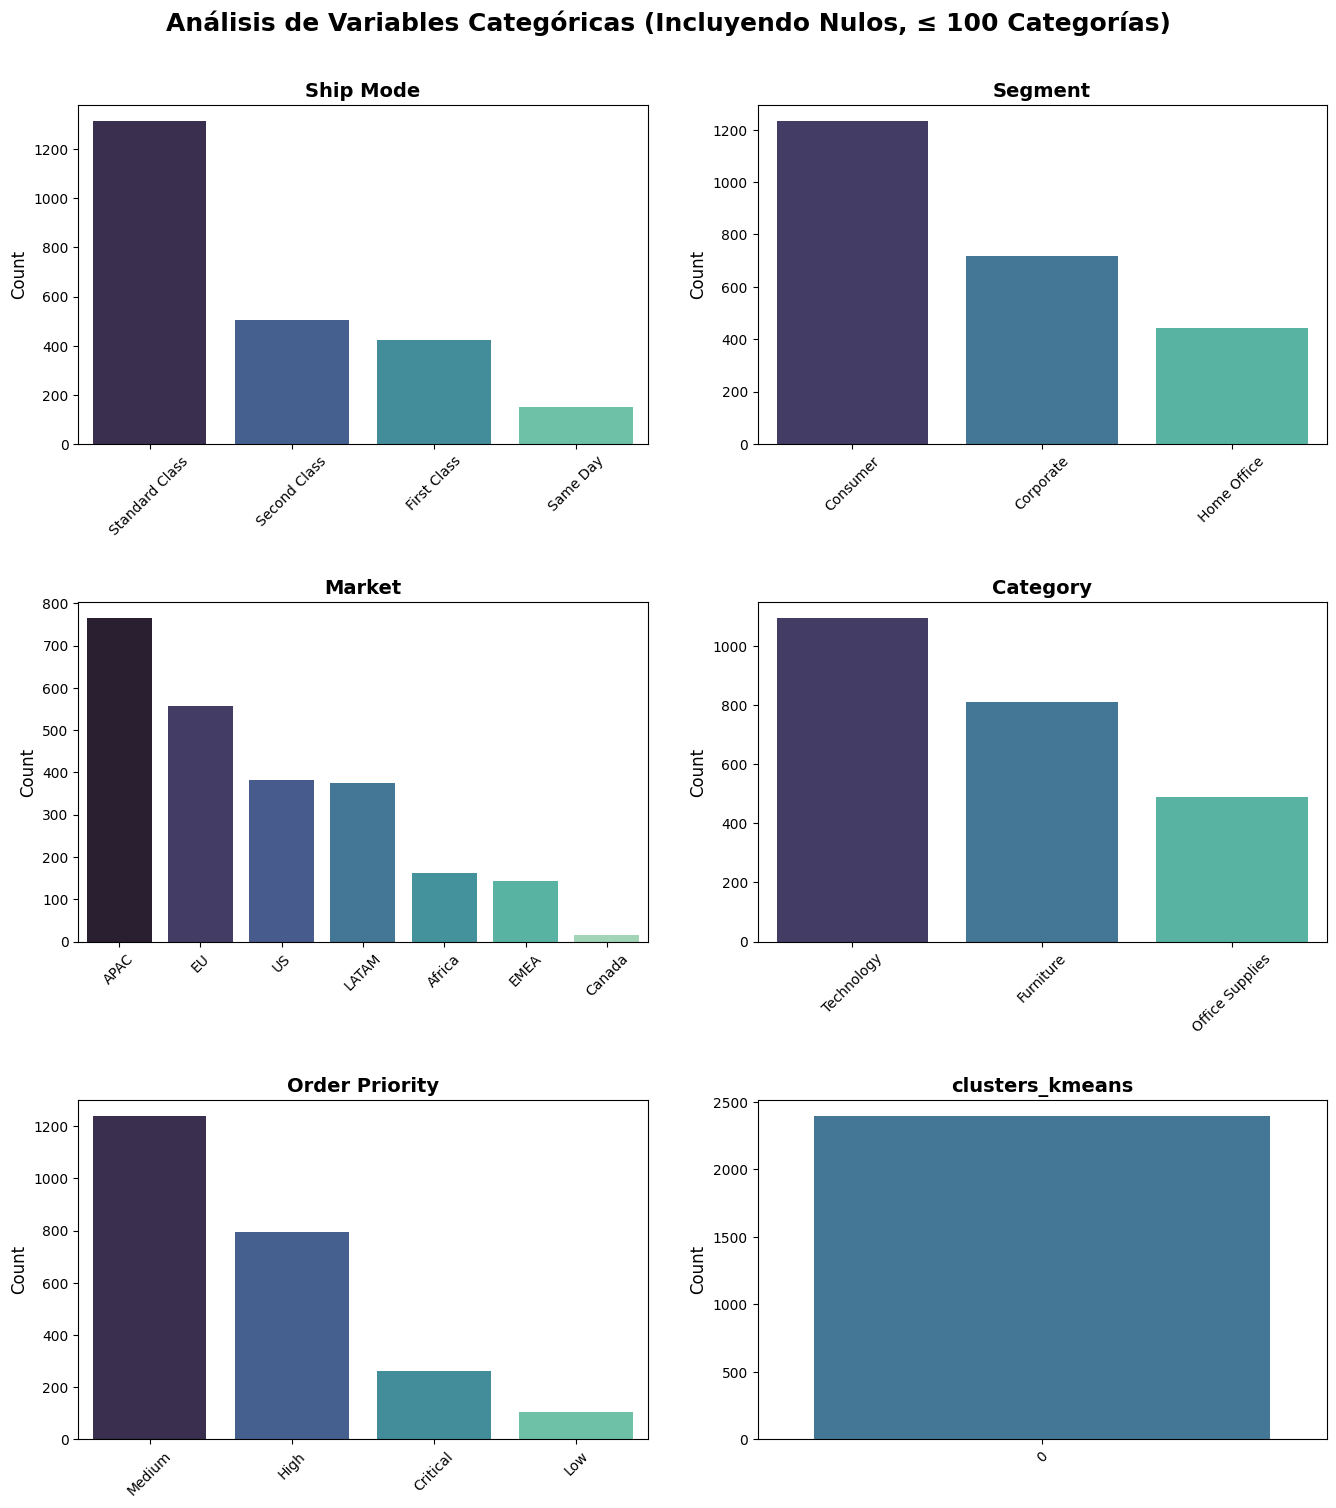

In [38]:
sp.plot_categoricas(df,max_categories=100) 

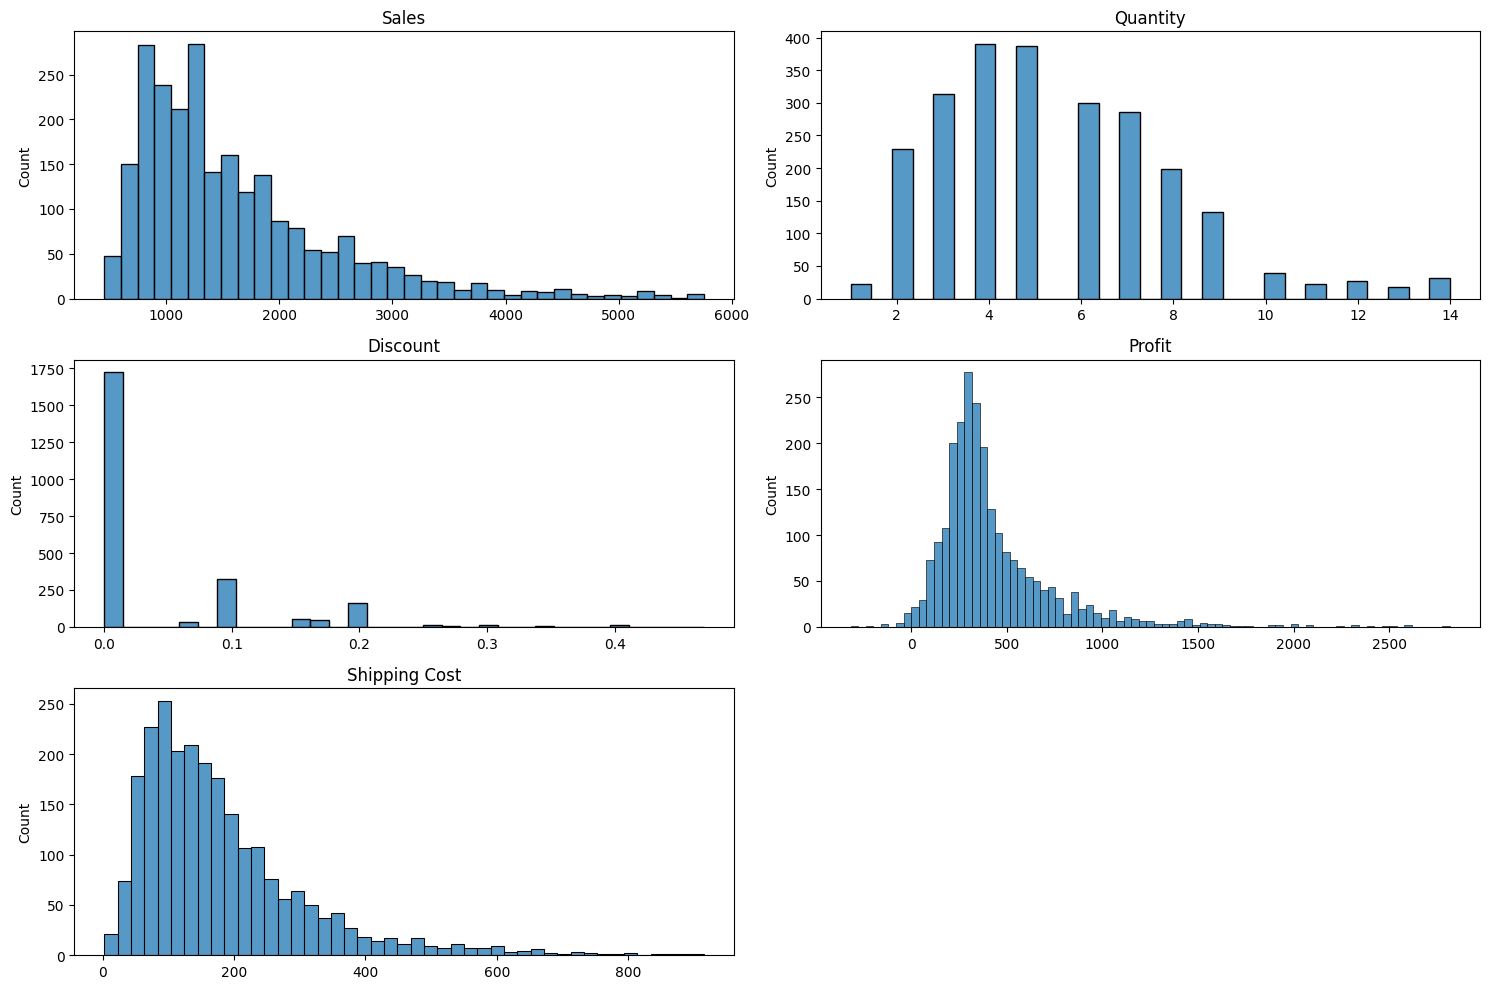

In [39]:
sp.plot_numericas(df)

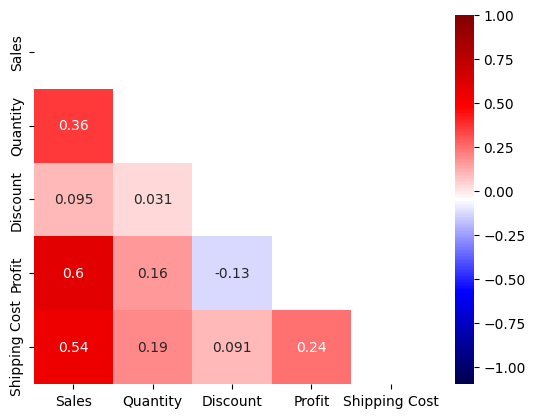

<Figure size 1000x1500 with 0 Axes>

In [40]:
sp.matriz_correlacion(df)

# Gestión de nulos

In [41]:
# Vemos la cantidad actual que tenemos de nan
print(df.isnull().sum())

Ship Mode          0
Segment            0
Market             0
Category           0
Sales              0
Quantity           0
Discount           0
Profit             0
Shipping Cost      0
Order Priority     0
clusters_kmeans    0
dtype: int64


In [42]:
# Vemos la cantidad total
df.isnull().sum().sum()

np.int64(0)

In [43]:
df.shape

(2395, 11)

# Gestion de Outiers

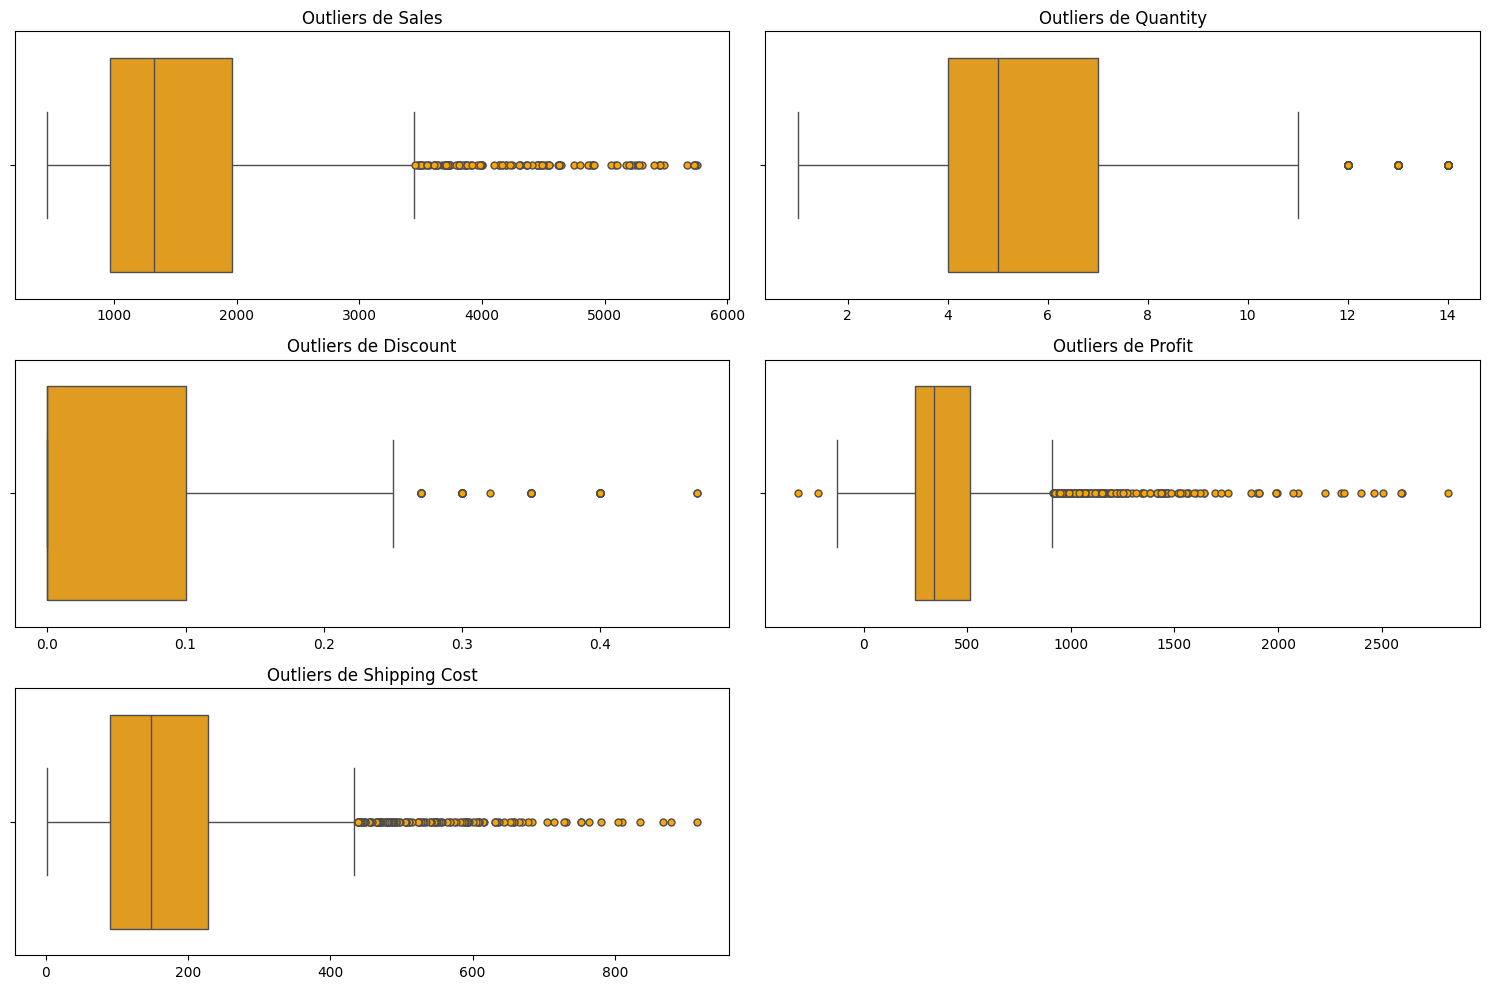

In [44]:
sp.detectar_outliers(df)

In [45]:
df.head(1)

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,0


In [46]:
col_numericas=df.select_dtypes(include=np.number).columns
lista_vecinos=[5, 10, 20, 50]
list_contaminacion = [0.01, 0.05, 0.1]

df_lof = df.copy()
df_lof = sp.gestion_nulos_lof(df_lof, col_numericas, lista_vecinos, list_contaminacion)

Aplicando LOF con diferentes parámetros: 100%|██████████| 12/12 [00:00<00:00, 37.65it/s]


In [47]:
df_lof.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,2395.0,1608.820672,891.376256,454.9500,969.1914,1322.93,1959.93,5751.54
Quantity,2395.0,5.482255,2.560382,1.0000,4.0000,5.00,7.00,14.00
Discount,2395.0,0.041380,0.075010,0.0000,0.0000,0.00,0.10,0.47
Profit,2395.0,427.302419,314.773060,-317.1528,247.0110,341.16,513.51,2817.99
Shipping Cost,2395.0,179.268025,126.137034,2.3400,90.9250,148.38,228.74,915.49
outliers_lof_5_0.01,2395.0,0.979958,0.199245,-1.0000,1.0000,1.00,1.00,1.00
outliers_lof_5_0.05,2395.0,0.899791,0.436412,-1.0000,1.0000,1.00,1.00,1.00
outliers_lof_5_0.1,2395.0,0.799582,0.600682,-1.0000,1.0000,1.00,1.00,1.00
outliers_lof_10_0.01,2395.0,0.979958,0.199245,-1.0000,1.0000,1.00,1.00,1.00
outliers_lof_10_0.05,2395.0,0.899791,0.436412,-1.0000,1.0000,1.00,1.00,1.00


In [48]:
col_numericas

Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost'], dtype='object')

In [49]:
combinaciones_variables = list(combinations(col_numericas, 2))
columnas_hue = df_lof.filter(like="outlier").columns

In [50]:
# sp.scatterplot_outliers(df_lof,combinaciones_variables,columnas_hue)

In [51]:
cantidad = 5
df_filtrado = df_lof[(df_lof == -1).sum(axis=1) > cantidad]
df_filtrado.shape

(73, 23)

In [52]:
df_filtrado.head()

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans,outliers_lof_5_0.01,outliers_lof_5_0.05,outliers_lof_5_0.1,outliers_lof_10_0.01,outliers_lof_10_0.05,outliers_lof_10_0.1,outliers_lof_20_0.01,outliers_lof_20_0.05,outliers_lof_20_0.1,outliers_lof_50_0.01,outliers_lof_50_0.05,outliers_lof_50_0.1
4,Same Day,Home Office,LATAM,Furniture,2221.800,7,0.0,622.0200,810.25,Critical,0,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
6,Second Class,Corporate,US,Technology,2249.910,9,0.0,517.4793,780.70,Critical,0,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1
8,First Class,Consumer,US,Technology,2735.952,6,0.2,341.9940,752.51,High,0,1,1,1,1,-1,-1,-1,-1,-1,1,-1,-1
9,First Class,Corporate,APAC,Furniture,2754.000,6,0.0,358.0200,752.47,Critical,0,1,1,1,-1,-1,-1,-1,-1,-1,1,-1,-1
17,First Class,Consumer,APAC,Technology,2875.095,5,0.1,511.0950,665.27,Medium,0,1,1,-1,1,1,-1,1,-1,-1,1,-1,-1


In [53]:
df_final=df.drop(index = df_filtrado.index).reset_index(drop=True)

In [54]:
df.shape

(2395, 11)

In [55]:
# df final para crear modelos
df_final.shape

(2322, 11)

In [56]:
df_final.head()

,Ship Mode,Segment,Market,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,First Class,Consumer,APAC,Technology,5175.171,9,0.1,919.971,915.49,Medium,0
1,Standard Class,Consumer,APAC,Furniture,5244.840,6,0.0,996.480,878.38,High,0
2,Standard Class,Corporate,US,Office Supplies,5083.960,5,0.2,1906.485,867.69,Low,0
3,First Class,Corporate,APAC,Furniture,4626.150,5,0.0,647.550,835.57,High,0
4,Second Class,Consumer,APAC,Office Supplies,3701.520,12,0.0,1036.080,804.54,Critical,0


In [57]:
df_final=df_final.drop_duplicates()

In [58]:
df_final.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000
mean,1600.486652,5.484927,0.040864,426.598336,173.293540
std,883.833960,2.562949,0.074083,306.549883,119.281377
min,471.000000,1.000000,0.000000,-68.722500,2.340000
25%,968.400000,4.000000,0.000000,248.115000,89.900000
50%,1316.494800,5.000000,0.000000,340.830000,144.965000
75%,1952.424000,7.000000,0.100000,510.442000,218.565000
max,5725.350000,14.000000,0.470000,2597.280000,915.490000


In [59]:
df_final.dtypes

Ship Mode           object
Segment             object
Market              object
Category            object
Sales              float64
Quantity             int64
Discount           float64
Profit             float64
Shipping Cost      float64
Order Priority      object
clusters_kmeans     object
dtype: object